In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\HP\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\anaconda3\envs\tensorflow_env\lib\site-pack

In [2]:
import numpy as np

<h1> Loading minst dataset </h1>

importing the mnist data set from keras and splitting it in to test and train data

In [3]:
(X_train,Y_train),(X_test,Y_test)= keras.datasets.mnist.load_data()

<h1> visualizing the data </h1>

In [4]:
len(X_train)

60000

In [5]:
len(X_train)

60000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

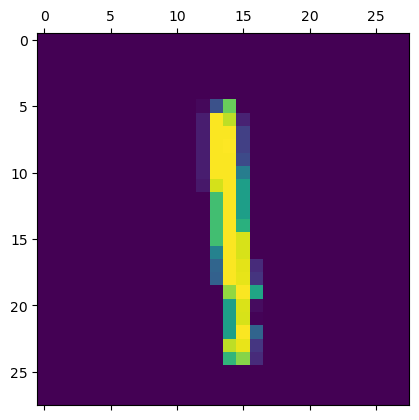

In [8]:
plt.matshow(X_train[8])

In [9]:
Y_train[8]

1

In [10]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

changing the data to 0-1  range for better accuracy

In [12]:
X_train= X_train/255
X_test = X_test/255

reshaping (flattening ) the data 

In [ ]:
X_train_flattend= X_train.reshape(len(X_train),28*28)
X_test_flattend= X_test.reshape(len(X_test),28*28)
X_train_flattend.shape


In [14]:
X_test_flattend.shape

(10000, 784)

In [15]:
X_train_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h1> Functions to train the model </h1>
<h3>first, model train with no hidden layer<h3> 

In [18]:
#training with no hidden layers
def no_hidden_layer(X_train_flattend,Y_train,epoch):
    model= keras.Sequential([
        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']

    )

    model.fit(X_train_flattend,Y_train,epochs=epoch )
    return model


<h3>second, model train with one hidden layer</h3>

In [20]:
#training with one hidden layer
def one_hidden_layer(X_train_flattend,Y_train,epoch):
    model= keras.Sequential([
        keras.layers.Dense(100,input_shape=(784,),activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])

    model.compile(
        
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
    )

    model.fit(X_train_flattend,Y_train,epochs=epoch)
    return model

<h1> Training the model with no hidden layers </h1> 

In [19]:
model=no_hidden_layer(X_train_flattend,Y_train,5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4880 - acc: 0.8781
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3063 - acc: 0.9157
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2853 - acc: 0.9211
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2746 - acc: 0.9236
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2677 - acc: 0.9265


<h1> Testing the model with no hidden layer </h1>

the model with no hidden layer gives an accuracy of 92 percent 

In [36]:
model.evaluate(X_test_flattend,Y_test)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.2694 - acc: 0.9248


[0.2693646245211363, 0.9248]

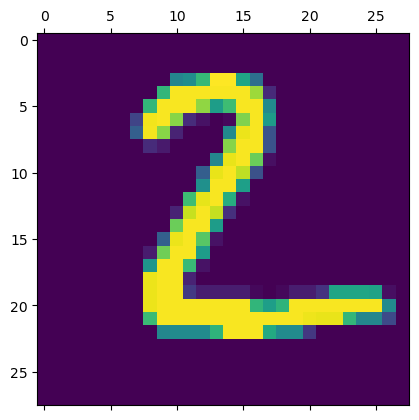

In [45]:
plt.matshow(X_test[1])

In [48]:
y_predicted=model.predict(X_test_flattend)
y_predicted[1]

array([3.8808584e-04, 1.5795231e-06, 4.2441338e-01, 1.6105175e-04,
       0.0000000e+00, 1.6191304e-03, 2.8702021e-03, 0.0000000e+00,
       7.0363283e-05, 0.0000000e+00], dtype=float32)

since the above cell out gave us the likeliness of all the 10 digits, we will out put the maximum likeliness using argmax

In [49]:
np.argmax(y_predicted[1])

2

In [52]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [76]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

<h2> printing the confusion matrix for the predicted and truth value for the model with no hidden layer</h2>

In [87]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions= y_predicted_labels)
with tf.Session() as sess:
    # Evaluate the tensor and retrieve its values
    confusion_matrix_values = sess.run(cm)

# Print the confusion matrix
print(confusion_matrix_values)



[[ 966    0    0    2    0    3    6    2    1    0]
 [   0 1113    2    2    0    1    4    2   11    0]
 [  11   11  910   18    8    2   13   12   43    4]
 [   4    0   14  926    0   19    2   11   28    6]
 [   1    1    2    1  903    0   13    4   11   46]
 [  12    3    2   35    9  763   22    6   32    8]
 [  13    3    5    1    7    6  919    2    2    0]
 [   1    7   21    6    6    1    0  945    3   38]
 [   8    7    6   17    9   19   10   10  878   10]
 [  11    7    1   11   23    4    0   20    7  925]]


<h2> printing the heatmap for the predicted and truth value for the model with no hidden layer </h2>

Text(95.72222222222221, 0.5, 'Truth')

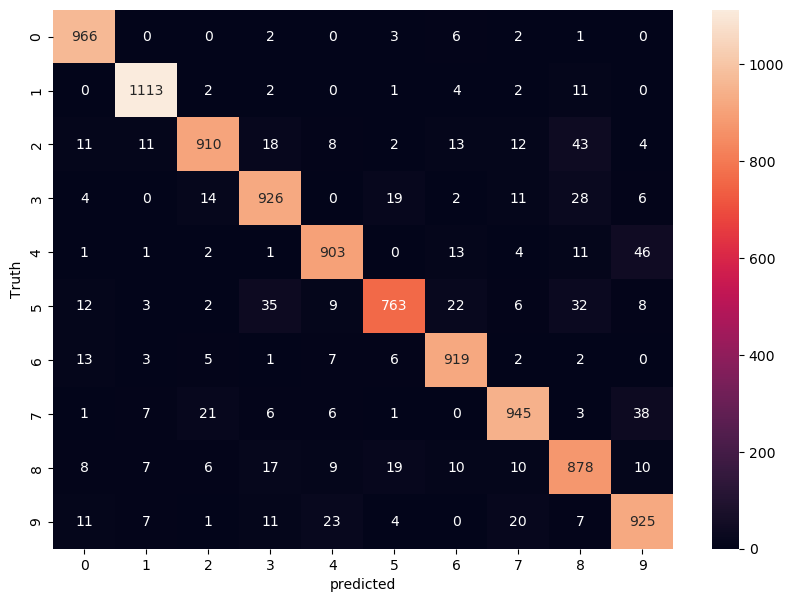

In [88]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix_values,annot= True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

<h1> training with one hidden layer </h1>

<p>adding on hidden layer for better accuracy </p>

In [21]:
model1=one_hidden_layer(X_train_flattend,Y_train,5)

Epoch 1/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2933 - acc: 0.9186
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1407 - acc: 0.9590
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1017 - acc: 0.9702
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0799 - acc: 0.9756
Epoch 5/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0634 - acc: 0.9811


<h1> Testing the model with one hidden layer </h1>

the model with one hidden layer gives an accuracy of 97 percent with is 5 percent more than the model with no hidden layer

In [91]:
model1.evaluate(X_test_flattend,Y_test)

10000/10000 [==============================] - 2s 162us/sample - loss: 0.0810 - acc: 0.9761


[0.0809901513507124, 0.9761]

 we will out put the maximum likeliness from all the 10 digits using argmax

In [99]:
y_predicted=model1.predict(X_test_flattend)
np.argmax(y_predicted[1])

2

In [100]:
y_predicted_labels1=[np.argmax(i) for i in y_predicted]
y_predicted_labels1[:5]

[7, 2, 1, 0, 4]

<h2> printing the confusion matrix for the predicted and truth value for the model with one hidden layer</h2>

In [101]:
cm1 = tf.math.confusion_matrix(labels=Y_test, predictions= y_predicted_labels1)
with tf.Session() as sess:
    # Evaluate the tensor and retrieve its values
    confusion_matrix_values1 = sess.run(cm1)

# Print the confusion matrix
print(confusion_matrix_values1)

[[ 971    0    1    2    0    2    0    1    3    0]
 [   0 1126    4    1    0    1    2    0    1    0]
 [   5    2 1009    1    1    0    2    4    8    0]
 [   0    1    9  974    0   18    0    2    5    1]
 [   2    2    2    1  954    0    7    1    1   12]
 [   2    1    0    1    1  873    6    2    5    1]
 [   5    3    0    0    3   10  935    0    2    0]
 [   2    8   16    2    1    0    0  991    3    5]
 [   3    0    3    6    1    4    3    2  950    2]
 [   3    4    0    4    7    6    0    3    4  978]]


<h2> printing the heat map for the predicted and truth value for the model with one hidden layer</h2>

Text(95.72222222222221, 0.5, 'Truth')

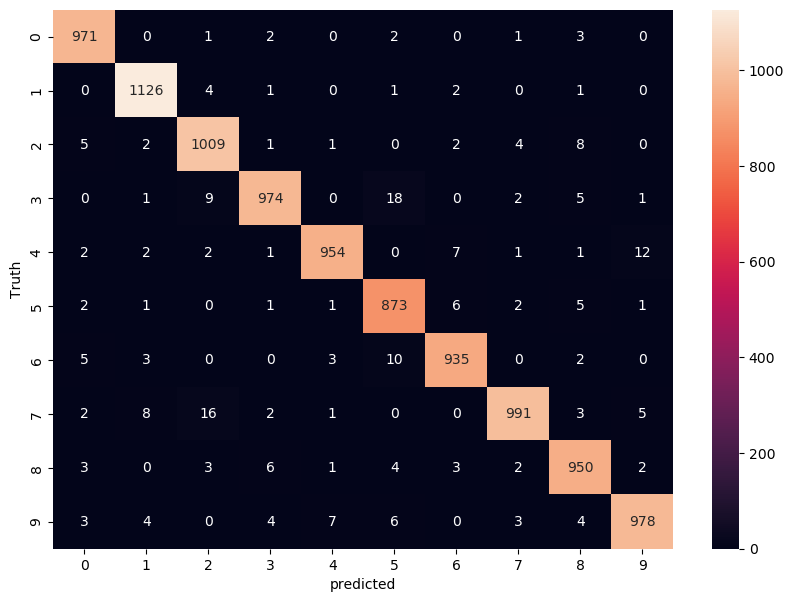

In [102]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix_values1,annot= True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')